In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import sys
import time

import seaborn as sns

In [270]:
import warnings
warnings.filterwarnings('default')

In [2]:
# parser v1
# parse records to list of dicts
# values mostly are strings
# easy to iterate through records
records = []
with open('Webscope_R6B/ydata-fp-td-clicks-v2_0.20111002') as f:
    for line in f.readlines():
        components = line.strip().split(' ')
        record = {}
        record['timestamp'] = int(components[0])
        record['displayed'] = components[1]
        record['clicked'] = int(components[2])
        # not using user feature
        record['user_features'] = []
        for i in range(4, len(components)):
            if components[i].startswith('|'):
                n = i
                break
            #record['user_features'].append(int(components[i]))
        record['pool'] = components[n:]    
        records.append(record)

In [3]:
len(records)

1607525

In [88]:
records[0]

{'clicked': 0,
 'displayed': 'id-560620',
 'pool': ['|id-552077',
  '|id-555224',
  '|id-555528',
  '|id-559744',
  '|id-559855',
  '|id-560290',
  '|id-560518',
  '|id-560620',
  '|id-563115',
  '|id-563582',
  '|id-563643',
  '|id-563787',
  '|id-563846',
  '|id-563938',
  '|id-564335',
  '|id-564418',
  '|id-564604',
  '|id-565364',
  '|id-565479',
  '|id-565515',
  '|id-565533',
  '|id-565561',
  '|id-565589',
  '|id-565648',
  '|id-565747',
  '|id-565822'],
 'timestamp': 1317513291,
 'user_features': []}

In [3]:
# parser that watches article lifespans
lives = {}
with open('Webscope_R6B/ydata-fp-td-clicks-v2_0.20111002') as f:
    for line in f.readlines():
        components = line.strip().split(' ')
        for component in components:
            if component.startswith('|id-'):
                timestamp = int(components[0])
                article = component[1:]
                if article in lives.keys():
                    lives[article][1] = timestamp
                else:
                    lives[article] = [timestamp, timestamp]

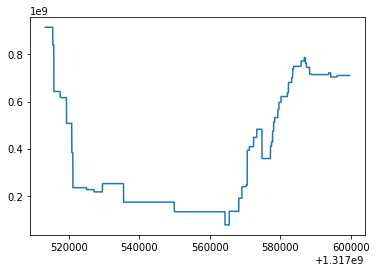

In [35]:
# life length variance along timespan
def get_life_length(x):
    lifespan = lives[x[1:]]
    return lifespan[1] - lifespan[0]
x = []
y = []
for record in records:
    x.append(record['timestamp'])
    y.append(np.var(list(map(lambda x:get_life_length(x), record['pool']))))
plt.plot(x,y)

In [145]:
# How many uncontinuous points
life = {}
uncontinuous = Counter()
with open('Webscope_R6B/ydata-fp-td-clicks-v2_0.20111002') as f:
    for line in f.readlines():
        components = line.strip().split(' ')
        timestamp = int(components[0])
        for component in components:
            if component.startswith('|id-'):
                article = component[4:]
                if article in life.keys():
                    if timestamp > life[article]+1:
                        uncontinuous[timestamp-life[article]-1] += 1
                life[article] = timestamp

In [146]:
uncontinuous

Counter({1: 434})

In [147]:
uncontinuous[1] / len(records)

0.00026998024914075985

In [55]:
# checking
l = {}
with open('Webscope_R6B/ydata-fp-td-clicks-v2_0.20111002') as f:
    for line in f.readlines():
        components = line.strip().split(' ')
        for component in components:
            if component.startswith('|id-'):
                timestamp = int(components[0])
                article = component[4:]
                if article in l.keys():
                    if l[article][-1] != timestamp:
                        l[article].append(timestamp)
                else:
                    l[article] = [timestamp]

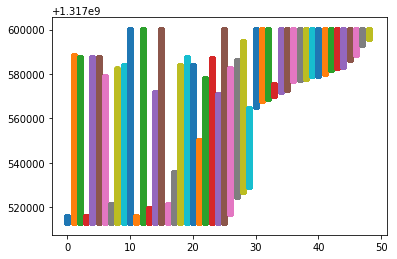

In [64]:
for n,i in enumerate(l.items()):
    plt.scatter([n]*len(i[1]), i[1])

In [100]:
lives.keys()

dict_keys(['id-552077', 'id-555224', 'id-555528', 'id-559744', 'id-559855', 'id-560290', 'id-560518', 'id-560620', 'id-563115', 'id-563582', 'id-563643', 'id-563787', 'id-563846', 'id-563938', 'id-564335', 'id-564418', 'id-564604', 'id-565364', 'id-565479', 'id-565515', 'id-565533', 'id-565561', 'id-565589', 'id-565648', 'id-565747', 'id-565822', 'id-565930', 'id-566013', 'id-566022', 'id-566092', 'id-560805', 'id-564371', 'id-562265', 'id-565980', 'id-566431', 'id-566439', 'id-559833', 'id-566541', 'id-562374', 'id-566587', 'id-566478', 'id-566573', 'id-566602', 'id-562637', 'id-566631', 'id-566689', 'id-566726', 'id-566825', 'id-566838'])

In [246]:
# average lifespan
sum(map(lambda x:x[1]-x[0], lives.values())) / len(lives)

40648.4693877551

In [9]:
life_length = []
alive = []
for v in lives.values():
    alive.append(np.arange(v[0], v[1]+1))
    life_length.append(v[1]-v[0])

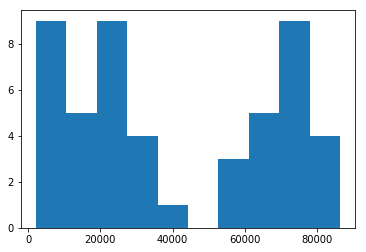

In [122]:
plt.hist(life_length)
pass

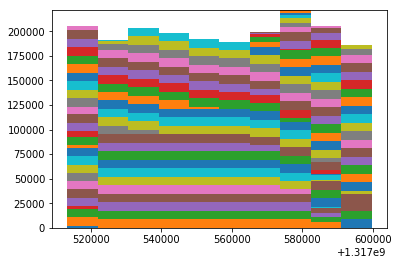

In [128]:
# number of arms available through out the timestamps
plt.hist(alive, histtype='barstacked')
pass

In [ ]:
estimated

In [65]:
records[0]['pool']

['|id-552077',
 '|id-555224',
 '|id-555528',
 '|id-559744',
 '|id-559855',
 '|id-560290',
 '|id-560518',
 '|id-560620',
 '|id-563115',
 '|id-563582',
 '|id-563643',
 '|id-563787',
 '|id-563846',
 '|id-563938',
 '|id-564335',
 '|id-564418',
 '|id-564604',
 '|id-565364',
 '|id-565479',
 '|id-565515',
 '|id-565533',
 '|id-565561',
 '|id-565589',
 '|id-565648',
 '|id-565747',
 '|id-565822']

In [56]:
# offline simulation for AG_L
# slow but more accurate version
# comsumes much more records


def AG_L2(n=1000,k=1, m=25, life_threshold=.1, records=records, lives=lives, verbose=True):
    '''
    n: number of turns to play
    m: number of turns to initialize
    k: adjust desire to exploit/explore
    '''
    def get_young_arms():
        time = records[i]['timestamp']
        born = filter(lambda x: x[1][0]<time, lives.items()) # fileter out unborn articles from lives
        life_rank = sorted(born, key= lambda x: x[1][1], reverse= True) # sort born articles by their expiring date
        young = life_rank[ : int(len(life_rank)*life_threshold)] # articles among top $life_threshold$% on the life ranking
        return list(zip(*young))[0]
    
    def get_best_arm():
        time = records[i]['timestamp']
        available = filter(lambda x:lives[x[0]][1] >= time, X.items())
        best = max(available, key= lambda x:x[1][0]/x[1][1])
        return best
    
    rewards = 0
    i = 0 # marker in records
    X = {} # dict of expectations article_id : array([sum, n_observations])
    t = 1 # number of turn taken
    
    # initialization
    while t<=m:
        record = records[i]
        displayed = record['displayed']
        clicked = record['clicked']
        if displayed not in X.keys():
            X[displayed] = np.array([clicked, 1])
            t += 1
        i += 1
    
    n_exploit = 0
    n_explore = 0
    try:
        while t<=n:
            best = get_best_arm()
            X_max = best[1][0]/best[1][1]
            if np.random.binomial(1, min(1, X_max*k)): # exploit
                n_exploit += 1
                while records[i]['displayed'] != get_best_arm()[0]:
                    i += 1
            else: # explore
                n_explore += 1
                while records[i]['displayed'] != np.random.choice(get_young_arms(), size=1):
                    i += 1
                    
            if verbose:
                if i%1000==0:
                    print(t, i)
                
            record = records[i]
            rewards += record['clicked']
            X[record['displayed']] = X.get(record['displayed'], np.array([0, 0])) + np.array([record['clicked'], 1])
            t += 1
            i += 1
            
    except IndexError:
        print('running out of records')
        return
        
    if verbose:
        print('# exploit:', n_exploit)
        print('# explore:', n_explore)
        print('# records:', i)
        print('max expectation:', X_max)


    return rewards

In [8]:
AG_L2(10000, life_threshold=.1)

619 16000
654 17000
2060 54000
2627 67000
2714 69000
2944 74000
3347 83000
4355 107000
5522 135000
6748 163000
6936 167000
7646 182000
8112 192000
8260 195000
# exploit: 568
# explore: 9407
# records: 231711
max expectation: 0.04746222394420767


454

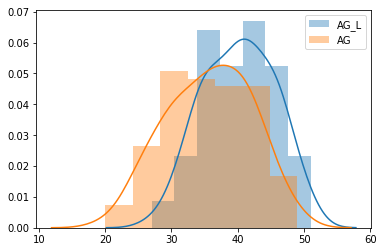

In [72]:
# compare by birth
agl = []
ag = []
for i in range(100):
    agl.append(AG_L2(n=1000, life_threshold=.5, verbose=False))
    ag.append(AG_L2(n=1000, life_threshold=1, verbose=False))
    print(i,end='\r',flush=True)
    time.sleep(.001)
sns.distplot(agl,label='AG_L')
sns.distplot(ag,label='AG')
plt.legend()
pass

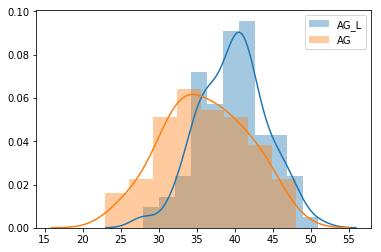

In [70]:
# compare by birth
agl = []
ag = []
for i in range(100):
    agl.append(AG_L2(n=1000,verbose=False))
    ag.append(AG_L2(n=1000, life_threshold=1, verbose=False))
    print(i,end='\r',flush=True)
    time.sleep(.001)
sns.distplot(agl,label='AG_L')
sns.distplot(ag,label='AG')
plt.legend()
pass

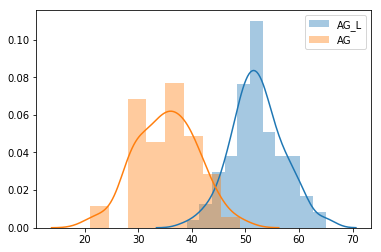

In [30]:
# knows exact lifespans
agl = []
ag = []
for i in range(100):
    agl.append(AG_L2(n=1000,verbose=False))
    ag.append(AG_L2(n=1000, life_threshold=1, verbose=False))
    print(i,end='\r',flush=True)
    time.sleep(.001)
sns.distplot(agl,label='AG_L')
sns.distplot(ag,label='AG')
plt.legend()
pass

In [374]:
# offline simulation for AG_L
# fast version, consumes much less records
def AG_L(n=10000,k=1, m=25, life_threshold=.3, records=records, lives=lives, verbose=True):
    # records should be long enough
    '''
    n: number of turns to play
    m: number of turns to initialize
    k: adjust desire to exploit/explore
    '''
    rewards = 0
    i = 0 # marker in records
    X = {} # dict of expectations article_id : array([sum, n_observations])
    t = 1 # number of turn taken
    
    # initialization
    while t<=m:
        try:
            displayed = records[i]['displayed']
            clicked = records[i]['clicked']
        except IndexError:
            print('running out of records')
            print(t,i)
            raise IndexError
        if displayed not in X.keys():
            X[displayed] = np.array([clicked, 1])
            t += 1
        i += 1
    
    n_exploit = 0
    n_explore = 0
    while t<=n:
        best = max(X.items(), key= lambda x:x[1][0]/x[1][1])
        X_max = best[1][0]/best[1][1]
        if np.random.binomial(1, min(1, X_max*k)): # exploit
            n_exploit += 1                       
            while i < len(records): # look for target arm
                displayed = records[i]['displayed']
                clicked = records[i]['clicked']
                if displayed == best[0]:
                    rewards += clicked
                    break
                i += 1
                
        else: # explore
            n_explore += 1           
            while i < len(records):
                displayed = records[i]['displayed']
                clicked = records[i]['clicked']
                time = records[i]['timestamp']
                born = filter(lambda x: x[1][0]<time, lives.items()) # fileter out unborn articles from lives
                life_rank = sorted(born, key= lambda x: x[1][1], reverse= True) # sort born articles by their expiring date
                young = life_rank[ : int(len(life_rank)*life_threshold)] # articles among top $life_threshold$% on the life ranking
                if displayed in list(zip(*young))[0]:
                    rewards += clicked
                    break
                i += 1

        X[displayed] = X.get(displayed, np.array([0, 0])) + np.array([clicked, 1])
        t += 1
        i += 1
        
    if verbose:
        print('# exploit:', n_exploit)
        print('# explore:', n_explore)
        print('# records:', i)
        print('max expectation:', X_max)
    
    return rewards, X

In [375]:
rewards, X = AG_L()
X

# exploit: 669
# explore: 9306
# records: 50701
max expectation: 0.05906921241050119


{'id-552077': array([0, 1]),
 'id-555224': array([  57, 1384]),
 'id-555528': array([  23, 1292]),
 'id-559744': array([0, 1]),
 'id-559855': array([0, 1]),
 'id-560290': array([0, 1]),
 'id-560518': array([0, 1]),
 'id-560620': array([0, 1]),
 'id-563115': array([0, 1]),
 'id-563582': array([0, 1]),
 'id-563643': array([  62, 1327]),
 'id-563787': array([0, 1]),
 'id-563846': array([  63, 1306]),
 'id-563938': array([ 1, 19]),
 'id-564335': array([0, 1]),
 'id-564418': array([  37, 1306]),
 'id-564604': array([0, 1]),
 'id-565364': array([0, 1]),
 'id-565479': array([0, 1]),
 'id-565515': array([  91, 1672]),
 'id-565533': array([0, 1]),
 'id-565561': array([0, 1]),
 'id-565589': array([0, 1]),
 'id-565648': array([0, 1]),
 'id-565747': array([0, 1]),
 'id-565822': array([  99, 1676])}

In [376]:
rewards, X = AG_L(records=records[30000:])
X

# exploit: 564
# explore: 9411
# records: 46077
max expectation: 0.05414949970570924


{'id-552077': array([0, 1]),
 'id-555224': array([  59, 1463]),
 'id-555528': array([  14, 1322]),
 'id-559744': array([0, 1]),
 'id-559855': array([0, 1]),
 'id-560290': array([0, 1]),
 'id-560518': array([0, 1]),
 'id-560620': array([0, 1]),
 'id-563115': array([0, 1]),
 'id-563582': array([0, 1]),
 'id-563643': array([  71, 1371]),
 'id-563787': array([0, 1]),
 'id-563846': array([  71, 1389]),
 'id-564335': array([0, 1]),
 'id-564418': array([  26, 1287]),
 'id-564604': array([0, 1]),
 'id-565364': array([0, 1]),
 'id-565479': array([0, 1]),
 'id-565515': array([  71, 1451]),
 'id-565533': array([0, 1]),
 'id-565561': array([0, 1]),
 'id-565589': array([0, 1]),
 'id-565648': array([0, 1]),
 'id-565747': array([0, 1]),
 'id-565822': array([  92, 1699])}

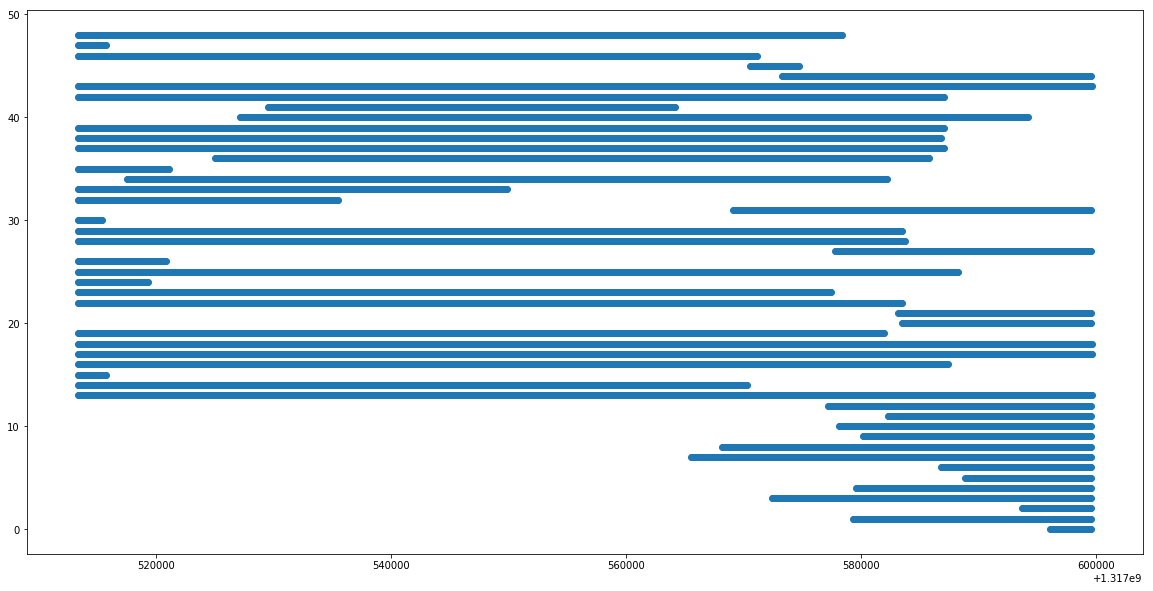

In [429]:
L=[]
arms=[]
for i,s in enumerate(sorted(goodness.items(), key= lambda g:g[1], reverse=True)):
    arm = s[0]
    l = np.arange(lives[arm][0], lives[arm][1], 100)
    L = np.append(L, l)
    arms = np.append(arms, [i]*len(l))
plt.figure(figsize=(20,10))
plt.scatter(L,arms)
pass

In [415]:
sorted(goodness.items(), key= lambda g:g[1], reverse=True)

[('id-566838', 0.11463550361713967),
 ('id-566587', 0.11086594096302835),
 ('id-566825', 0.09476142809476143),
 ('id-566431', 0.08826115629808749),
 ('id-566478', 0.07156365084104709),
 ('id-566726', 0.06429497869186585),
 ('id-566689', 0.058011478206917946),
 ('id-560805', 0.05495116102240159),
 ('id-564371', 0.04578649901568553),
 ('id-566573', 0.04406484046373243),
 ('id-562374', 0.04339168287487265),
 ('id-566602', 0.04024376221685639),
 ('id-559833', 0.03938828131946297),
 ('id-565822', 0.03695473536798491),
 ('id-565747', 0.03369702497895032),
 ('id-559744', 0.03322259136212625),
 ('id-565515', 0.032897932746801965),
 ('id-563643', 0.03174658287327986),
 ('id-563846', 0.03159612513454394),
 ('id-563115', 0.03114630028526518),
 ('id-566631', 0.03050512535506978),
 ('id-562637', 0.029768400630532314),
 ('id-565533', 0.029426845943482223),
 ('id-565589', 0.02775355095938201),
 ('id-563938', 0.02729693741677763),
 ('id-555224', 0.026303860921501707),
 ('id-564604', 0.0262386787426744

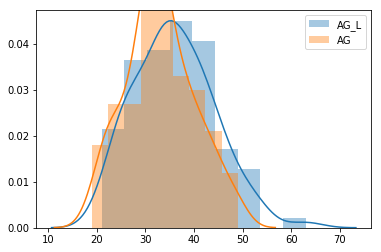

In [38]:
# knows exact lifespans
# play i different games
agl = []
ag = []
for i in range(100):
    agl.append(AG_L(n=1000, m=20, records=records[i*10000:100000+i*10000], verbose=False))
    ag.append(AG_L(n=1000, m=20, records=records[i*10000:100000+i*10000], life_threshold=1, verbose=False))
    print(i,end='\r',flush=True)
    time.sleep(.001)
sns.distplot(agl,label='AG_L')
sns.distplot(ag,label='AG')
plt.legend()
pass

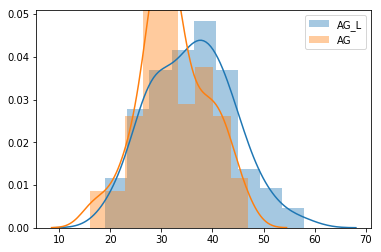

In [99]:
# knows exact lifespans
# play i different games
agl = []
ag = []
for i in range(100):
    agl.append(AG_L(n=1000, m=20, records=records[i*10000:100000+i*10000], verbose=False))
    ag.append(AG_L(n=1000, m=20, records=records[i*10000:100000+i*10000], life_threshold=1, verbose=False))
    print(i,end='\r',flush=True)
    time.sleep(.001)
sns.distplot(agl,label='AG_L')
sns.distplot(ag,label='AG')
plt.legend()
pass

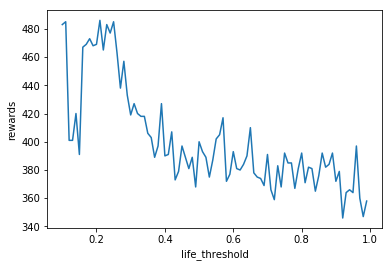

In [35]:
x = []
y = []
for b in np.arange(0.1,1.,.01):
    x.append(b)
    y.append(AG_L(n=10000,life_threshold=b, verbose=False))
plt.plot(x,y)
plt.xlabel('life_threshold')
plt.ylabel('rewards')
pass

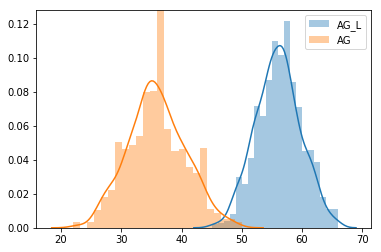

In [84]:
agl = []
ag = []
for i in range(1000):
    agl.append(AG_L(n=1000,verbose=False))
    ag.append(AG_L(n=1000, life_threshold=1, verbose=False))
    print(i,end='\r',flush=True)
    time.sleep(.001)
sns.distplot(agl,label='AG_L')
sns.distplot(ag,label='AG')
plt.legend()
pass

In [51]:
# offline simulation for UCB_L
def UCB_L(n=1000, c=.005, m=25, r=1, records=records, lives=lives, verbose=True, mode=True):
    # records should be long enough
    '''
    n: number of turns to play
    m: number of turns to initialize
    k: adjust desire to exploit/explore
    mode: whether the modification is active or not
    '''
    def ucb(x):
        # r: ratio between paces of timestamp and turns
        time = records[i]['timestamp']
        article = x[0]
        acc_reward, T = x[1]
        die = lives[article][1]
        s = S.get(article, t)
        if mode:
            return acc_reward/T + c*np.log(r*(die-time)+1) * np.sqrt(2*np.log(t-s+1) / T)
        else:
            return acc_reward/T + np.sqrt(2*np.log(t-s+1)/T)
        
    rewards = 0
    i = 0 # marker in records
    X = {} # dict of expectations article_id : array([sum, n_observations])
    t = 1 # number of turn taken
    S = {} # records the first turn an arm is played
    # initialization
    while t<=m:
        displayed = records[i]['displayed']
        clicked = records[i]['clicked']
        if displayed not in X.keys():
            S[displayed] = t
            X[displayed] = np.array([clicked, 1])
            t += 1
        i += 1
    
    while t<=n:
        while i<len(records):
            fake = False
            displayed = records[i]['displayed']
            clicked = records[i]['clicked']
            
            if displayed not in X.keys(): # use previous mean as an estimation for an unseen arm
                fake = True
                estimation = sum(map(lambda x:x[0]/x[1], X.values())) / len(X) 
                X[displayed] = np.array([estimation, 1])
                            
            best = max(X.items(), key= lambda x:ucb(x))
            
            if fake:
                X.pop(displayed)

            if displayed == best[0]:
                rewards += clicked
                if displayed not in S.keys(): # the first time an arm is played
                    S[displayed] = t
                X[displayed] = X.get(displayed, np.array([0, 0])) + np.array([clicked, 1])
                break
            i += 1
            
        if i>=len(records):
            print('running out of records')
            return
        
        if verbose:       
            if i%1000==0:
                print(t,i)
            
        t += 1
        i += 1
    if verbose:
        print('# X', len(X.keys()))
        print('# records', i)
        return rewards, X
    return rewards

In [332]:
life_length = {}
rewards_log = []

In [431]:
# test version
def UCB_L2(n=1000, c=.0005, m=25, reward_rate=1, records=records, lives=lives, verbose=True, mode=True):
    def ucb(x):
        time = records[i]['timestamp']
        article = x[0]
        acc_reward, T = x[1]
        birth_time, death_time = lives[article]
        if article not in S.keys():
            S[article] = t
        s = S[article]
        if mode:
            life_left = life_est[article] - t + s
            life_spent = t-s
            
            '''
            # dynamic ratio from turn to timestamp
            try:
                turn2time = (t-1)/(time-starting_time)
            except ZeroDivisionError:
                turn2time = t-1
                
            # unborn or dead arms
            if death_time < time or time <= birth_time:
                return 0'''
                    
            '''life_left = (death_time - time) * turn2time
            life_spent = (time - birth_time) * turn2time'''
            
            '''# trace estimated life length(in turns)
            if article not in life_length:
                life_length[article] = []
            else:
                life_length[article].append(life_left + life_spent)'''
            
            estimation = acc_reward/T
            life_regulation = c*np.log(life_left+1)
            potential = np.sqrt(2* np.log(life_spent) / T)
            
            
            if verbose and t>m+1 and article==best[0]:
                print(article, estimation, life_regulation* potential, life_regulation*potential/estimation)
                
            return estimation + life_regulation * potential
        else:
            return acc_reward/T + np.sqrt(2*np.log(t-s)/T)
        
    rewards = 0
    #rewards_log = [0]
    i = 0 # marker in records
    X = {} # dict of expectations article_id : array([sum, n_observations])
    t = 1 # number of turn taken
    S = {} # records the first turn an arm is played
    # initialization
    while t<=m:
        displayed = records[i]['displayed']
        clicked = records[i]['clicked'] * reward_rate
        if displayed not in X.keys():
            S[displayed] = t
            X[displayed] = np.array([clicked, 1])
            if t==1:
                starting_time = records[i]['timestamp']
            t += 1
        i += 1
    
    while t<=n:
        rec_used = 0
        while True:
            displayed = records[i]['displayed']
            clicked = records[i]['clicked'] * reward_rate
                
            # initialize all uninitialized available arms with mean of past arms
            tmp = {}
            for article in records[i]['pool']:
                article = article[1:]
                estimation = sum(map(lambda x:x[0]/x[1], X.values())) / len(X) 
                if article not in X.keys():
                    tmp[article] = np.array([estimation, 1])
            
            best = max((*X.items(), *tmp.items()), key= lambda x:ucb(x))
            

            if displayed == best[0]:
                rewards += clicked
                if displayed not in S.keys(): # the first time an arm is played
                    S[displayed] = t
                X[displayed] = X.get(displayed, np.array([0, 0])) + np.array([clicked, 1])
                break
            '''this won't happen
                else:
                if best[0] not in X.keys():
                    print('fail to explore')'''
            
            i += 1
            rec_used += 1
            '''if rec_used>300:
                if rec_used%200==0:
                    print(best[0])'''
            '''if rec_used>1000:
                return'''

        t += 1
        i += 1
        #rewards_log.append(rewards)
    
    return rewards/reward_rate

In [434]:
UCB_L2(c=1, reward_rate=250)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt


id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 125.0 14.865260204528651 0.11892208163622921
id-563938 

id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars


id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 25.0 7.01013598885732 0.28040543955429276
id-563938 22.727272727272727 6.718858259896132 0.29562976343542985
id-565648 0.0 29.46735481792174 inf
id-565648 0.0 29.46735481792174 inf
id-565648 0.0 29.46735481792174 inf
id-565648 0.0 29.46735481792174 inf
id-565648 0.0 29.46735481792174 inf
id-565648 0.0 20.922003334816896 inf
id-563938 22.727272727272727 6.752449205297295 0.297107765033081
id-563938 22.727272727272727 6.752449205297295 0.297107765033081
id-563938 22.727272727272727 6.752449205297295 0.297107765033081
id-563938 22.727272727272727 6.752449205297295 0.297107765033081
id-563938 22.727272727272727 6.752449205297295 0.297107765033081
id-563938 22.72727272727272

id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 25.0 9.63630296074654 0.3854521184298616
id-565822 22.727272727272727 9.21953643218736 0.4056596030162438
id-565822 22.727272727272727 9.21953643218736 0.4056596030162438
id-565822 22.727272727272727 9.21953643218736 0.4056596030162438
id-565822 22.727272727272727 9.21953643218736 0.4056596030162438
id-565822 22.7272727272727

id-555528 0.0 30.25025563484825 inf
id-555528 0.0 30.25025563484825 inf
id-555528 0.0 30.25025563484825 inf
id-555528 0.0 30.25025563484825 inf
id-555528 0.0 21.459420351228424 inf
id-555224 1.6666666666666665 28.697061534596546 17.218236920757928
id-555224 1.6666666666666665 28.697061534596546 17.218236920757928
id-555224 1.6666666666666665 28.697061534596546 17.218236920757928
id-555224 1.6666666666666665 28.697061534596546 17.218236920757928
id-555224 1.6666666666666665 28.697061534596546 17.218236920757928
id-555224 1.6666666666666665 28.697061534596546 17.218236920757928
id-555224 0.0 28.847731045909597 inf
id-564335 0.0 30.368443326512736 inf
id-564335 0.0 30.368443326512736 inf
id-564335 0.0 30.368443326512736 inf
id-564335 0.0 30.368443326512736 inf
id-564335 0.0 30.368443326512736 inf
id-564335 0.0 30.368443326512736 inf
id-564335 0.0 30.368443326512736 inf
id-564335 0.0 30.368443326512736 inf
id-564335 0.0 30.368443326512736 inf
id-564335 0.0 30.368443326512736 inf
id-564335 

id-563938 20.833333333333332 7.130224200111455 0.34225076160534984
id-563938 20.833333333333332 7.130224200111455 0.34225076160534984
id-563938 19.23076923076923 6.863354922492139 0.35689445596959124
id-565822 17.857142857142858 8.626821127531624 0.48310198314177094
id-565822 17.857142857142858 8.626821127531624 0.48310198314177094
id-565822 17.857142857142858 8.626821127531624 0.48310198314177094
id-565822 17.857142857142858 8.626821127531624 0.48310198314177094
id-565822 33.333333333333336 8.350758281192316 0.2505227484357695
id-565822 33.333333333333336 8.350758281192316 0.2505227484357695
id-565822 33.333333333333336 8.350758281192316 0.2505227484357695
id-565822 33.333333333333336 8.350758281192316 0.2505227484357695
id-565822 33.333333333333336 8.350758281192316 0.2505227484357695
id-565822 33.333333333333336 8.350758281192316 0.2505227484357695
id-565822 33.333333333333336 8.350758281192316 0.2505227484357695
id-565822 33.333333333333336 8.350758281192316 0.2505227484357695
id-5

id-565822 41.666666666666664 6.709319781697149 0.16102367476073157
id-565822 41.666666666666664 6.709319781697149 0.16102367476073157
id-565822 41.666666666666664 6.709319781697149 0.16102367476073157
id-565822 41.666666666666664 6.709319781697149 0.16102367476073157
id-565822 40.0 6.584532168513753 0.16461330421284381
id-565822 40.0 6.584532168513753 0.16461330421284381
id-565822 40.0 6.584532168513753 0.16461330421284381
id-565822 40.0 6.584532168513753 0.16461330421284381
id-565822 40.0 6.584532168513753 0.16461330421284381
id-565822 40.0 6.584532168513753 0.16461330421284381
id-565822 40.0 6.584532168513753 0.16461330421284381
id-565822 40.0 6.584532168513753 0.16461330421284381
id-565822 40.0 6.584532168513753 0.16461330421284381
id-565822 40.0 6.584532168513753 0.16461330421284381
id-565822 40.0 6.584532168513753 0.16461330421284381
id-565822 40.0 6.584532168513753 0.16461330421284381
id-565822 40.0 6.584532168513753 0.16461330421284381
id-565822 40.0 6.584532168513753 0.16461330

id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.78378378378378 5.50905756303559 0.16306810386585346
id-565822 33.783783783783

id-565822 28.40909090909091 5.097251932058127 0.17942326800844605
id-565822 28.40909090909091 5.097251932058127 0.17942326800844605
id-565822 28.40909090909091 5.097251932058127 0.17942326800844605
id-565822 28.40909090909091 5.097251932058127 0.17942326800844605
id-565822 28.40909090909091 5.097251932058127 0.17942326800844605
id-565822 28.40909090909091 5.097251932058127 0.17942326800844605
id-565822 28.40909090909091 5.097251932058127 0.17942326800844605
id-565822 28.40909090909091 5.097251932058127 0.17942326800844605
id-565822 28.40909090909091 5.097251932058127 0.17942326800844605
id-565822 28.40909090909091 5.097251932058127 0.17942326800844605
id-565822 28.40909090909091 5.097251932058127 0.17942326800844605
id-565822 27.77777777777778 5.046394029768358 0.18167018507166088
id-565822 27.77777777777778 5.046394029768358 0.18167018507166088
id-565822 27.77777777777778 5.046394029768358 0.18167018507166088
id-565822 27.77777777777778 5.046394029768358 0.18167018507166088
id-565822 

id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 28.30188679245283 4.692596458670323 0.16580507487301807
id-565822 

id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 27.77777777777778 4.348346692938718 0.15654048094579384
id-565822 

id-565822 23.64864864864865 4.052584470050015 0.17136642901925778
id-565822 23.64864864864865 4.052584470050015 0.17136642901925778
id-565822 23.64864864864865 4.052584470050015 0.17136642901925778
id-565822 23.64864864864865 4.052584470050015 0.17136642901925778
id-565822 23.64864864864865 4.052584470050015 0.17136642901925778
id-565822 23.64864864864865 4.052584470050015 0.17136642901925778
id-565822 23.64864864864865 4.052584470050015 0.17136642901925778
id-565822 23.64864864864865 4.052584470050015 0.17136642901925778
id-565822 23.64864864864865 4.052584470050015 0.17136642901925778
id-565822 23.64864864864865 4.052584470050015 0.17136642901925778
id-565822 23.333333333333332 4.028924717195059 0.17266820216550252
id-560620 0.0 27.589165164384877 inf
id-560620 0.0 27.589165164384877 inf
id-560620 0.0 27.589165164384877 inf
id-560620 0.0 27.589165164384877 inf
id-560620 0.0 27.589165164384877 inf
id-560620 0.0 27.589165164384877 inf
id-560620 0.0 27.589165164384877 inf
id-560620 0.0 

id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 0.17696417058056976
id-565822 22.435897435897434 3.9703499809743215 

id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 22.22222222222222 3.730119635193875 0.16785538358372437
id-565822 

id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 0.14172216483746844
id-565822 25.252525252525253 3.5788425464007183 

id-565822 24.12280701754386 3.366846843263257 0.13957110550254956
id-565822 24.12280701754386 3.366846843263257 0.13957110550254956
id-565822 24.12280701754386 3.366846843263257 0.13957110550254956
id-565822 24.12280701754386 3.366846843263257 0.13957110550254956
id-565822 24.12280701754386 3.366846843263257 0.13957110550254956
id-565822 24.12280701754386 3.366846843263257 0.13957110550254956
id-565822 24.12280701754386 3.366846843263257 0.13957110550254956
id-565822 24.12280701754386 3.366846843263257 0.13957110550254956
id-565822 24.12280701754386 3.366846843263257 0.13957110550254956
id-565822 24.12280701754386 3.366846843263257 0.13957110550254956
id-565822 24.12280701754386 3.366846843263257 0.13957110550254956
id-565822 24.12280701754386 3.366846843263257 0.13957110550254956
id-565822 23.91304347826087 3.3541698675525518 0.14026528537037944
id-565822 23.91304347826087 3.3541698675525518 0.14026528537037944
id-565822 23.91304347826087 3.3541698675525518 0.14026528537037944
id-5658

id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
id-563643 0.0 25.580089774128655 inf
i

id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 25.14837712260639 inf
id-565533 0.0 20.54463119658

id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.290381694823314 0.45161526779293254
id-565589 25.0 11.2903816948

id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.13868473171370066
id-565822 23.4375 3.250423399539859 0.1386847317

id-565822 23.381294964028775 3.1341409049429925 0.1340447956267926
id-565822 23.381294964028775 3.1341409049429925 0.1340447956267926
id-565822 23.214285714285715 3.12424364514114 0.13458280317531063
id-565822 23.214285714285715 3.12424364514114 0.13458280317531063
id-565822 23.214285714285715 3.12424364514114 0.13458280317531063
id-565822 23.214285714285715 3.12424364514114 0.13458280317531063
id-565822 23.214285714285715 3.12424364514114 0.13458280317531063
id-565822 23.214285714285715 3.12424364514114 0.13458280317531063
id-565822 23.214285714285715 3.12424364514114 0.13458280317531063
id-565822 23.214285714285715 3.12424364514114 0.13458280317531063
id-565822 23.214285714285715 3.12424364514114 0.13458280317531063
id-565822 23.214285714285715 3.12424364514114 0.13458280317531063
id-565822 23.214285714285715 3.12424364514114 0.13458280317531063
id-565822 23.214285714285715 3.12424364514114 0.13458280317531063
id-565822 23.214285714285715 3.12424364514114 0.13458280317531063
id-56582

id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 0.14176577738351143
id-565822 21.241830065359476 3.0113645522641317 

id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 0.14438834854913668
id-565822 20.569620253164558 2.9700134986373055 

id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 0.13885032286155924
id-565822 20.833333333333332 2.8927150596158175 

id-563938 15.625 7.140402591377077 0.45698576584813294
id-563938 15.625 7.140402591377077 0.45698576584813294
id-563938 15.625 7.140402591377077 0.45698576584813294
id-563938 15.625 7.140402591377077 0.45698576584813294
id-563938 15.625 7.140402591377077 0.45698576584813294
id-563938 15.625 7.140402591377077 0.45698576584813294
id-563938 15.625 7.140402591377077 0.45698576584813294
id-563938 15.625 7.140402591377077 0.45698576584813294
id-563938 15.625 7.140402591377077 0.45698576584813294
id-563938 15.625 7.140402591377077 0.45698576584813294
id-563938 15.625 7.140402591377077 0.45698576584813294
id-563938 15.625 7.140402591377077 0.45698576584813294
id-563938 15.625 7.140402591377077 0.45698576584813294
id-563938 14.705882352941176 6.9293564833574255 0.47119624086830497
id-565822 19.886363636363637 2.834929375571414 0.1425564486001625
id-565822 19.886363636363637 2.834929375571414 0.1425564486001625
id-565822 19.886363636363637 2.834929375571414 0.1425564486001625
id-565822 19.886363

id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 20.27027027027027 2.7742030610999957 0.1368606843475998
id-565822 

id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.13138322779678302
id-565822 20.72538860103627 2.7229684517467985 0.1313832277967

id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 21.35678391959799 2.686543638084769 0.12579345505385153
id-565822 

id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 20.531400966183575 2.64040757638089 0.12860338077902217
id-565822 

id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.495412844036696 2.581069039421126 0.13239365896324837
id-565822 19.40639269406393 2.5758919954613444 0.1327341992955

id-565822 19.144144144144143 2.5661593387940385 0.13404408781465332
id-565822 19.144144144144143 2.5661593387940385 0.13404408781465332
id-565822 19.05829596412556 2.5610860542047753 0.13438169178533294
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.336208715080623 0.3334483486032249
id-565589 25.0 8.

id-565589 18.51851851851852 7.187697109007482 0.38813564388640404
id-565589 18.51851851851852 7.187697109007482 0.38813564388640404
id-565589 17.857142857142858 7.059982494639214 0.395359019699796
id-565589 17.857142857142858 7.059982494639214 0.395359019699796
id-565589 17.857142857142858 7.059982494639214 0.395359019699796
id-565589 17.857142857142858 7.059982494639214 0.395359019699796
id-565589 17.857142857142858 7.059982494639214 0.395359019699796
id-565589 17.857142857142858 7.059982494639214 0.395359019699796
id-565589 17.857142857142858 7.059982494639214 0.395359019699796
id-565589 17.857142857142858 7.059982494639214 0.395359019699796
id-565589 17.857142857142858 7.059982494639214 0.395359019699796
id-565589 17.24137931034483 6.938957717356179 0.40245954760665836
id-565589 17.24137931034483 6.938957717356179 0.40245954760665836
id-565589 17.24137931034483 6.938957717356179 0.40245954760665836
id-565589 25.0 6.824059822621368 0.2729623929048547
id-565589 25.0 6.824059822621368 

id-565589 22.727272727272727 5.654325084239943 0.2487903037065575
id-565589 22.727272727272727 5.654325084239943 0.2487903037065575
id-565589 22.727272727272727 5.654325084239943 0.2487903037065575
id-565589 22.727272727272727 5.654325084239943 0.2487903037065575
id-565589 22.727272727272727 5.654325084239943 0.2487903037065575
id-565589 22.727272727272727 5.654325084239943 0.2487903037065575
id-565589 22.727272727272727 5.654325084239943 0.2487903037065575
id-565589 22.727272727272727 5.654325084239943 0.2487903037065575
id-565589 22.727272727272727 5.654325084239943 0.2487903037065575
id-565589 22.727272727272727 5.654325084239943 0.2487903037065575
id-565589 22.727272727272727 5.654325084239943 0.2487903037065575
id-565589 22.22222222222222 5.592494233343904 0.2516622405004757
id-565589 22.22222222222222 5.592494233343904 0.2516622405004757
id-565589 22.22222222222222 5.592494233343904 0.2516622405004757
id-565589 22.22222222222222 5.592494233343904 0.2516622405004757
id-565589 22.2

id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.28147172855229935
id-565589 17.857142857142858 5.026280867005346 0.2814717285522

id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.28950822514864943
id-565589 16.949152542372882 4.906919070316093 0.2895082251486

id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 18.47826086956522 2.559232822392351 0.13849965862358604
id-565822 

id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 18.162393162393162 2.540560415683979 0.1398802675929532
id-565822 

id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.14092392811278065
id-565822 17.932489451476794 2.527116854343113 0.1409239281127

KeyboardInterrupt: 

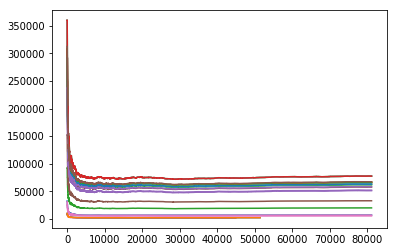

In [335]:
for i in life_length.values():
    plt.plot(i)

In [337]:
len(life_length)

26

In [336]:
life_est={}
for key in life_length:
    life_est[key] = life_length[key][-1]
life_est

{'id-552077': 1813.0,
 'id-555224': 67279.30250990752,
 'id-555528': 66202.94848084543,
 'id-559744': 2090.0,
 'id-559855': 66202.94848084543,
 'id-560290': 66202.94848084543,
 'id-560518': 58399.38177014531,
 'id-560620': 7003.476882430647,
 'id-563115': 61628.44385733157,
 'id-563582': 63242.9749009247,
 'id-563643': 77500.18097754293,
 'id-563787': 2090.0,
 'id-563846': 77500.18097754293,
 'id-563938': 5388.945838837517,
 'id-564335': 51941.25759577278,
 'id-564418': 77500.18097754293,
 'id-564604': 6734.388375165125,
 'id-565364': 19919.725231175693,
 'id-565479': 62973.88639365918,
 'id-565515': 66472.03698811095,
 'id-565533': 62973.88639365918,
 'id-565561': 32835.97357992074,
 'id-565589': 57592.11624834874,
 'id-565648': 65933.8599735799,
 'id-565747': 51133.99207397622,
 'id-565822': 77500.18097754293}

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt


<Container object of 12 artists>

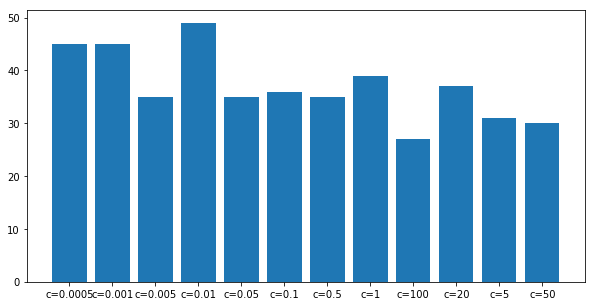

In [361]:
# use estimated life length(in turns)
plt.figure(figsize=(10,5))
cs = [.0005, .001, .005, .01, .05, .1, .5, 1, 5, 20, 50, 100]
xs = []
ys = []
for c in cs:
    xs.append( 'c={}'.format(str(c)) )
    ys.append(UCB_L2(c=c,records=records[3000:], verbose=False))
plt.bar(xs, ys)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in sqrt


<Container object of 12 artists>

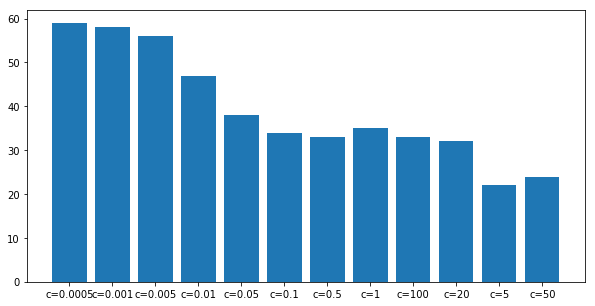

In [359]:
# use estimated life length(in turns)
plt.figure(figsize=(10,5))
cs = [.0005, .001, .005, .01, .05, .1, .5, 1, 5, 20, 50, 100]
xs = []
ys = []
for c in cs:
    xs.append( 'c={}'.format(str(c)) )
    ys.append(UCB_L2(c=c,records=records[1500:], verbose=False))
plt.bar(xs, ys)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in sqrt


<Container object of 12 artists>

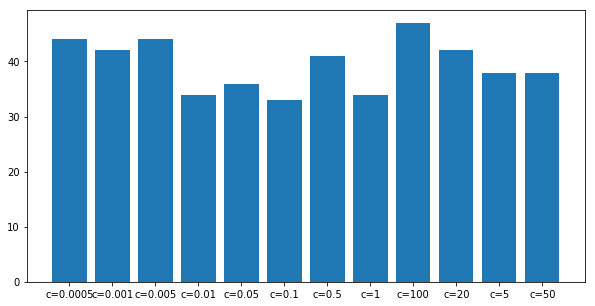

In [344]:
# use estimated life length(in turns)
plt.figure(figsize=(10,5))
cs = [.0005, .001, .005, .01, .05, .1, .5, 1, 5, 20, 50, 100]
xs = []
ys = []
for c in cs:
    xs.append( 'c={}'.format(str(c)) )
    ys.append(UCB_L2(c=c, verbose=False))
plt.bar(xs, ys)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt


<Container object of 9 artists>

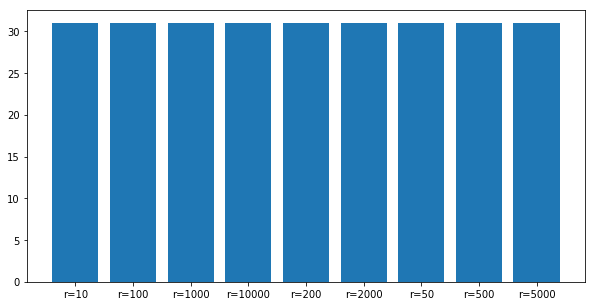

In [435]:
# use estimated life length(in turns)
plt.figure(figsize=(10,5))
rs = [10,50,100,200,500,1000,2000,5000,10000]
xs = []
ys = []
for r in rs:
    xs.append( 'r={}'.format(str(r)) )
    ys.append(UCB_L2(reward_rate=r, verbose=False))
plt.bar(xs, ys)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in sqrt


<Container object of 11 artists>

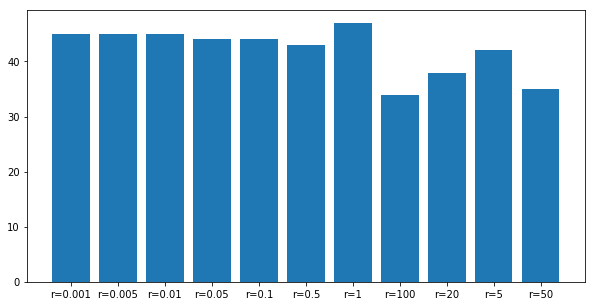

In [349]:
# use estimated life length(in turns)
plt.figure(figsize=(10,5))
rs = [.001, .005, .01, .05, .1, .5, 1, 5, 20, 50, 100]
xs = []
ys = []
for r in rs:
    xs.append( 'r={}'.format(str(r)) )
    ys.append(UCB_L2(reward_rate=r, verbose=False))
plt.bar(xs, ys)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in sqrt


<Container object of 16 artists>

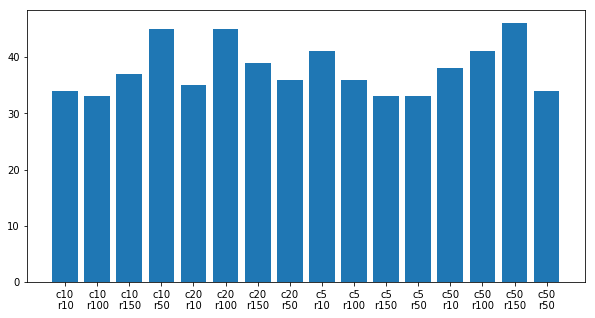

In [351]:
# use estimated life length(in turns)
plt.figure(figsize=(10,5))
cs = [5,10,20,50]
rs = [10,50,100,150]
xs = []
ys = []
for c in cs:
    for r in rs:
        xs.append( 'c{}\nr{}'.format(str(c),str(r)) )
        ys.append(UCB_L2(c=c,reward_rate=r, verbose=False))
plt.bar(xs, ys)

In [345]:
UCB_L2(c=10000, verbose=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in sqrt


45

In [346]:
UCB_L2(reward_rate=10000, verbose=False)/10000

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in sqrt


31.0

In [323]:
UCB_L2(mode=False)

38

In [314]:
UCB_L2(reward_rate=5, verbose=False)/5

39.0

In [315]:
UCB_L2(reward_rate=1, c=.005, verbose=False)

38

In [316]:
UCB_L2(reward_rate=.1, c=.001, verbose=False)

47.999999999999986

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in sqrt


/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


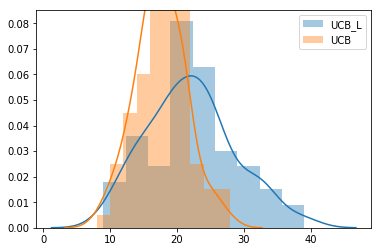

In [363]:
ucbl = []
ucbn = []
for i in range(100):
    ucbl.append(UCB_L2(n=500, m=20, c=.0005, records=records[i*300:1000000+i*300], verbose=False))
    ucbn.append(UCB_L2(n=500, m=20, records=records[i*300:1000000+i*300], mode=False, verbose=False))
    print(i+1,end='\r',flush=True)
    time.sleep(.0001)
sns.distplot(ucbl,label='UCB_L')
sns.distplot(ucbn,label='UCB')
plt.legend()
pass

In [364]:
np.count_nonzero(np.array(ucbl)-np.array(ucbn)>0)

70

In [15]:
for i in X:
    print(i, X[i], lives[i][1]-lives[i][0])
# id [totalRewards timesPlayed] lifeLength

id-560620 [0 6] 7808
id-565648 [0 9] 73508
id-563115 [ 2 51] 68708
id-552077 [0 4] 2108
id-564335 [0 9] 57908
id-565589 [0 9] 64208
id-563938 [ 1 27] 6008
id-560290 [ 1 32] 73808
id-563643 [ 0 10] 86403
id-565822 [ 0 10] 86403
id-563787 [ 1 25] 2408
id-555528 [0 9] 73808
id-565364 [ 1 29] 22208
id-559855 [0 9] 73808
id-560518 [0 9] 65108
id-565561 [0 8] 36608
id-564604 [0 6] 7508
id-563846 [ 0 10] 86403
id-563582 [ 1 32] 70508
id-565533 [ 3 69] 70208
id-565479 [0 9] 70208
id-559744 [0 4] 2408
id-565515 [ 38 595] 74108
id-564418 [ 0 10] 86403
id-565747 [0 9] 57008


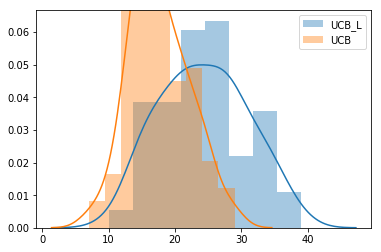

In [18]:
ucbl = []
ucbn = []
for i in range(100):
    ucbl.append(UCB_L(n=500, m=20, r=.8, c=0.005, records=records[i*100:1000000+i*100], verbose=False))
    ucbn.append(UCB_L(n=500, m=20, r=.8, records=records[i*100:1000000+i*100], mode=False, verbose=False))
    print(i,end='\r',flush=True)
    time.sleep(.001)
sns.distplot(ucbl,label='UCB_L')
sns.distplot(ucbn,label='UCB')
plt.legend()
pass

In [317]:
from collections import Counter

In [379]:
goodness = {}
for record in records:
    goodness[record['displayed']] = goodness.get(record['displayed'], 0) + record['clicked']
goodness

{'id-552077': 47,
 'id-555224': 1973,
 'id-555528': 1014,
 'id-559744': 80,
 'id-559833': 886,
 'id-559855': 1232,
 'id-560290': 1119,
 'id-560518': 550,
 'id-560620': 143,
 'id-560805': 1879,
 'id-562265': 640,
 'id-562374': 937,
 'id-562637': 491,
 'id-563115': 2140,
 'id-563582': 1776,
 'id-563643': 2743,
 'id-563787': 21,
 'id-563846': 2730,
 'id-563938': 164,
 'id-564335': 606,
 'id-564371': 1442,
 'id-564418': 1171,
 'id-564604': 197,
 'id-565364': 457,
 'id-565479': 1608,
 'id-565515': 2438,
 'id-565533': 2066,
 'id-565561': 752,
 'id-565589': 1782,
 'id-565648': 1161,
 'id-565747': 1921,
 'id-565822': 3193,
 'id-565930': 1259,
 'id-565980': 44,
 'id-566013': 1061,
 'id-566022': 964,
 'id-566092': 493,
 'id-566431': 2409,
 'id-566439': 285,
 'id-566478': 1438,
 'id-566541': 574,
 'id-566573': 859,
 'id-566587': 2261,
 'id-566602': 700,
 'id-566631': 494,
 'id-566689': 748,
 'id-566726': 694,
 'id-566825': 568,
 'id-566838': 412}

In [413]:
a=1
a/=2
a

0.5

In [414]:
for g in goodness:
    goodness[g] /= lives[g][1] - lives[g][0]
goodness

{'id-552077': 0.022296015180265655,
 'id-555224': 0.026303860921501707,
 'id-555528': 0.01373834814654238,
 'id-559744': 0.03322259136212625,
 'id-559833': 0.03938828131946297,
 'id-559855': 0.01669195751138088,
 'id-560290': 0.015160958161716887,
 'id-560518': 0.008447502611046261,
 'id-560620': 0.01831454918032787,
 'id-560805': 0.05495116102240159,
 'id-562265': 0.02091913447081127,
 'id-562374': 0.04339168287487265,
 'id-562637': 0.029768400630532314,
 'id-563115': 0.03114630028526518,
 'id-563582': 0.02518863107732456,
 'id-563643': 0.03174658287327986,
 'id-563787': 0.00872093023255814,
 'id-563846': 0.03159612513454394,
 'id-563938': 0.02729693741677763,
 'id-564335': 0.010464875319472267,
 'id-564371': 0.04578649901568553,
 'id-564418': 0.013552770158443573,
 'id-564604': 0.02623867874267448,
 'id-565364': 0.020578170028818444,
 'id-565479': 0.022903372835004557,
 'id-565515': 0.032897932746801965,
 'id-565533': 0.029426845943482223,
 'id-565561': 0.02054195804195804,
 'id-5655

In [319]:
c=Counter()
i=0
while i<len(records[:30000]):
    c[records[i]['clicked']] += 1
    i += 1
c

Counter({0: 28949, 1: 1051})

In [28]:
c[1]/(c[0]+c[1])

0.03397894278471563